In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [3]:
len(data)

90

In [4]:
l = data.l.values
t = data.t.values

tsq = t * t #vector point-to-point product

vanilla/batch gradient descent

In [5]:
def train(x, y, m, c, eta):
    const = - 2.0/len(y) #differentaition wrt ycalc on sum((y - ycalc)**2)/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc)) #change in slope
    delta_c = const * sum(y - ycalc) #change in intercept
    m = m - delta_m * eta #new slope, closer to points, lesser error
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y) #mean sqr error meth https://www.statisticshowto.datasciencecentral.com/mean-squared-error/
    return m, c, error


In [6]:
def train_on_all(x, y, m, c, eta, iterations=100):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

In [7]:
def calc_err(eta, nitr): #eta, number of iterations
    m,c =0,0
    err_list = []
    for iteration in range(2000):
        m, c, error = train(l, tsq, m, c, eta)
        err_list.append(error)
    return m,c,err_list

In [8]:
nitr = 2000
eta_list = [0.1,0.01,0.001,0.0001]
m = []
c = []
err = []
for eta in eta_list:
    a,b,e = calc_err(eta, nitr)
    m.append(a)
    c.append(b)
    err.append(e)

plot lines now

In [9]:
y = []
for i in range(len(eta_list)):
    y.append(m[i] * l + c[i])

In [10]:
c

[0.07358041685220443,
 0.29994038598822065,
 1.5055820672545144,
 0.7175807393958825]

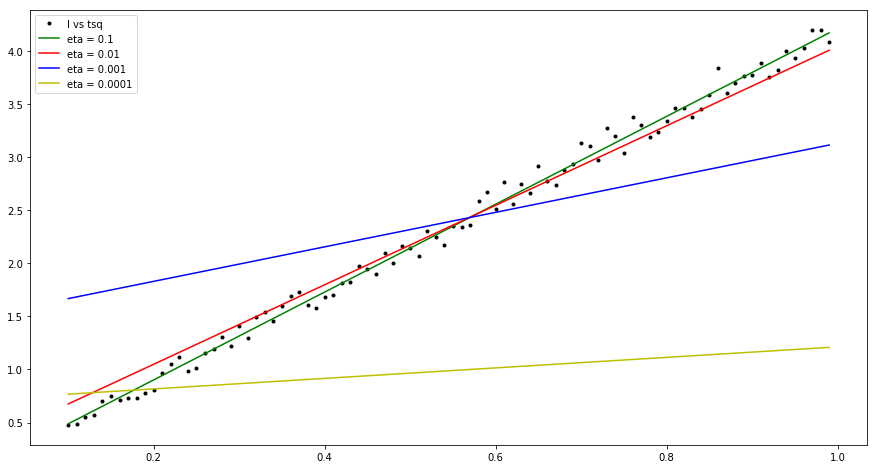

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(l, tsq, '.k')
plt.plot(l, y[0], "g")
plt.plot(l, y[1], "r")
plt.plot(l, y[2], "b")
plt.plot(l, y[3], "y")
plt.legend(["l vs tsq","eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

plot errors at each of 200 steps

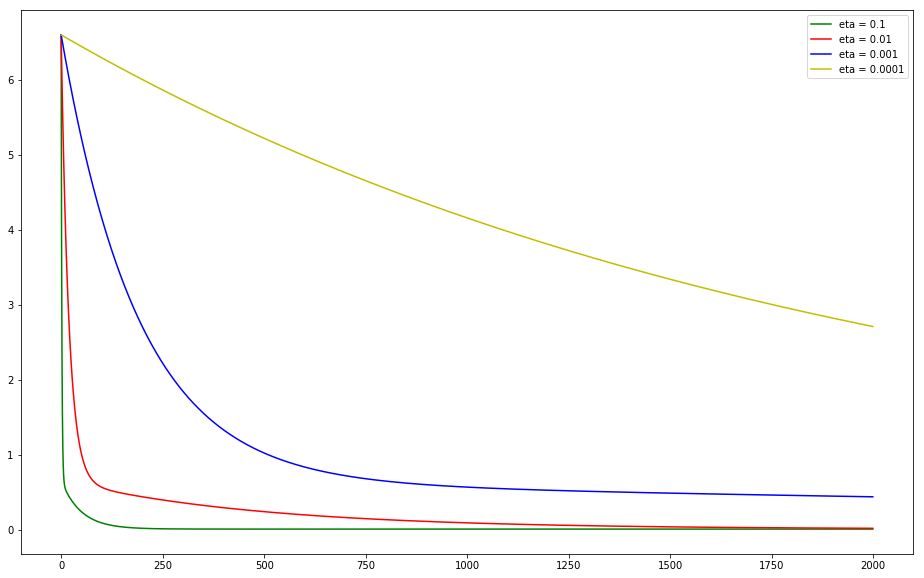

In [12]:
epochs = range(0,nitr)
plt.figure(figsize=(16,10))
plt.plot(epochs, err[0], "g")
plt.plot(epochs, err[1],"r")
plt.plot(epochs, err[2],"b")
plt.plot(epochs, err[3],"y")
plt.legend(["eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

larger eta

In [13]:
m_l,c_l,err_l = calc_err(0.8, 1000) #eta 0.8 for 1000 iterations

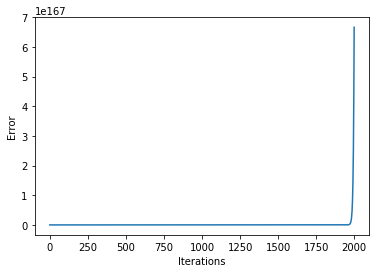

In [14]:
plt.plot(range(len(err_l)), err_l)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

In [15]:
print(m_l,c_l,err_l[-1])

-3.906416698762918e+83 -6.799329749722207e+83 6.661142373837791e+167


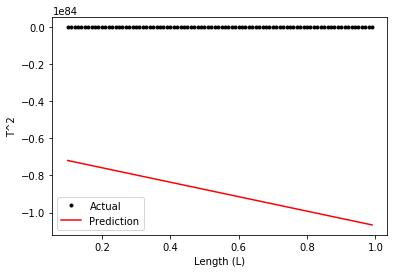

In [16]:
y_l = m_l * l + c_l
plt.plot(l, tsq, '.k', label = 'Actual')
plt.plot(l,y_l,"r", label = 'Prediction')
plt.xlabel("Length (L)")
plt.ylabel("T^2")
plt.legend()
plt.show()

decreasing eta (decay in learning rate)

In [17]:
def calc_err_deacay_lr(eta, decay_factor, nitr): #eta, decay, number of iterations
    m,c =0,0
    err_list = []
    for iteration in range(nitr):
        eta = max(0.0001,eta * decay_factor) #limiting eta to not go below 0.0001
        m, c, error = train(l, tsq, m, c, eta)
        err_list.append(error)
    return m,c,err_list,eta

In [18]:
m_d,c_d,err_d,eta_d = calc_err_deacay_lr(0.5, 0.95, 1000)
print(m_d,c_d,err_d[-1],eta_d)

3.004810872627533 0.7266331232698716 0.09539724073290663 0.0001


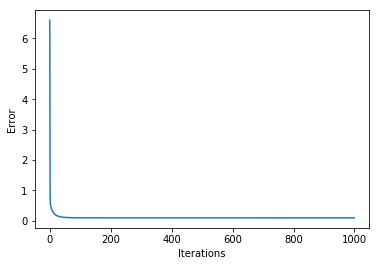

In [19]:
plt.plot(range(len(err_d)), err_d)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

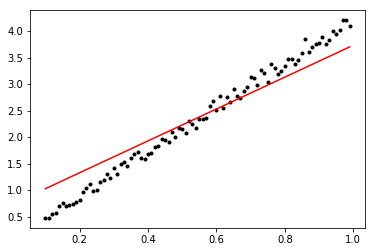

In [20]:
y_d = m_d * l + c_d
plt.plot(l, tsq, '.k')
plt.plot(l,y_d,"r")
plt.show()